In [96]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [97]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [98]:
base_dir = '/content/gdrive/MyDrive/Klasifikasi Sampah'
os.listdir(base_dir)

['Anorganik', 'Beracun (B3)', 'Organik']

In [99]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15)

In [100]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(128, 128),
        batch_size=140,
        class_mode='categorical')

Found 4500 images belonging to 3 classes.


In [101]:
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128,128),
    batch_size=32,
    subset='validation')

Found 675 images belonging to 3 classes.


In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Building the CNN model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [103]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 128)     

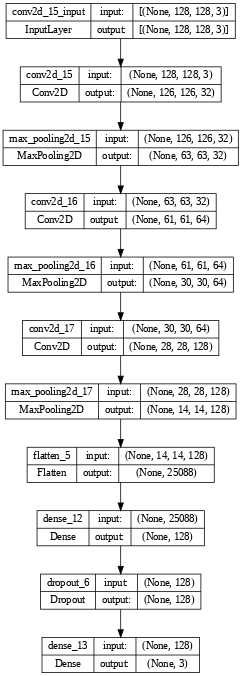

In [104]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [105]:
# Pelatihan model
hist = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=1
)

Epoch 1/50
32/32 [==============================] - 47s 1s/step - loss: 0.9997 - accuracy: 0.4826 - val_loss: 0.8962 - val_accuracy: 0.5446
Epoch 2/50
32/32 [==============================] - 43s 1s/step - loss: 0.8745 - accuracy: 0.5683 - val_loss: 0.8798 - val_accuracy: 0.5565
Epoch 3/50
32/32 [==============================] - 41s 1s/step - loss: 0.8199 - accuracy: 0.6018 - val_loss: 0.8110 - val_accuracy: 0.6622
Epoch 4/50
32/32 [==============================] - 45s 1s/step - loss: 0.7907 - accuracy: 0.6404 - val_loss: 0.7951 - val_accuracy: 0.6622
Epoch 5/50
32/32 [==============================] - 44s 1s/step - loss: 0.7526 - accuracy: 0.6649 - val_loss: 0.7404 - val_accuracy: 0.6964
Epoch 6/50
32/32 [==============================] - 42s 1s/step - loss: 0.7015 - accuracy: 0.6913 - val_loss: 0.6986 - val_accuracy: 0.7277
Epoch 7/50
32/32 [==============================] - 40s 1s/step - loss: 0.6907 - accuracy: 0.6961 - val_loss: 0.6487 - val_accuracy: 0.7664
Epoch 8/50
32/32 [==

In [106]:
loss, acc = model.evaluate(validation_generator,verbose=0)
print('Accuracy on validating data: ',round(acc*100),'% \nLoss on validating data: {:.4f}'.format(loss),'\n')

Accuracy on validating data:  100 % 
Loss on validating data: 0.0105 



In [107]:
print('Akurasi training : ',round(max(hist.history['accuracy'])*100),'%')
print('Akurasi validation : ',round(max(hist.history['val_accuracy'])*100),'%')

Akurasi training :  99 %
Akurasi validation :  100 %


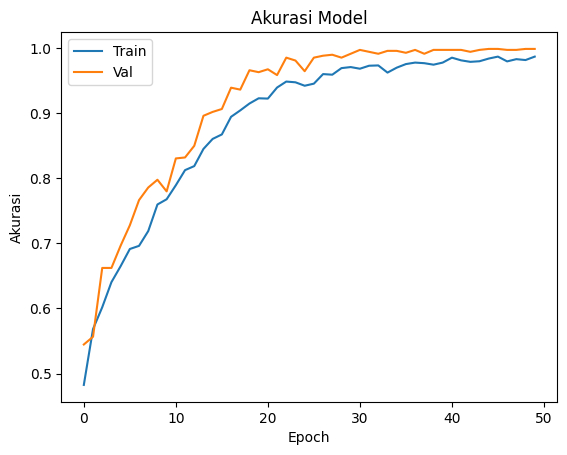

In [108]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

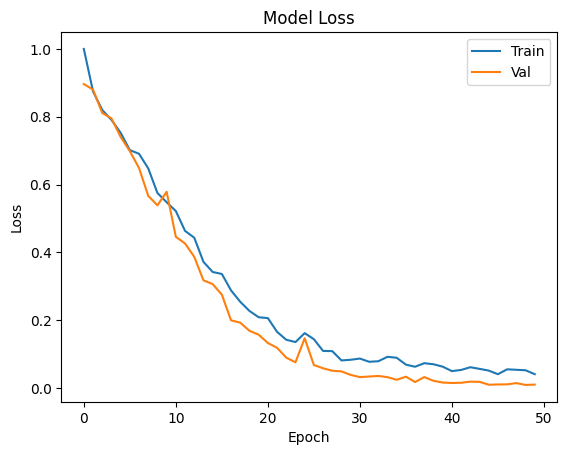

In [109]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [110]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn

Saving download.jpeg to download (2).jpeg


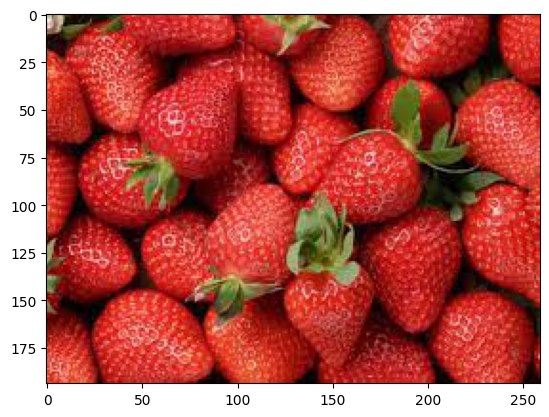

In [111]:
new_image = plt.imread(path)
img = plt.imshow(new_image)

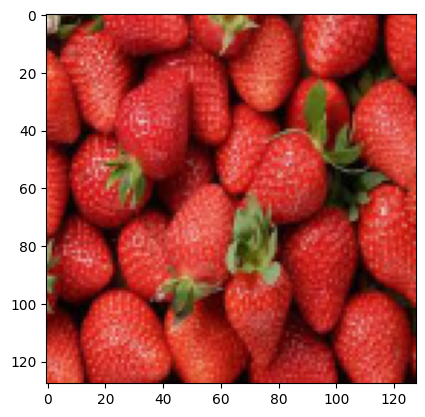

In [112]:
from skimage.transform import resize
resized_image = resize(new_image, (128,128,3))
img = plt.imshow(resized_image)

In [113]:
predictions = model.predict(np.array([resized_image]))
predictions

1/1 [==============================] - 0s 113ms/step


array([[6.1337147e-07, 4.9391328e-03, 9.9506027e-01]], dtype=float32)

In [114]:
classification = ['Anorganik', 'Organik', 'Beracun (B3)']
list_index = [0, 1, 2]  # Adjust the list_index according to the desired labels

for i in range(len(list_index)):
    label = classification[list_index[i]]
    probability = predictions[0][list_index[i]] * 100
    print(label, ':', round(probability, 2), '%')


Anorganik : 0.0 %
Organik : 0.49 %
Beracun (B3) : 99.51 %


Sampah Organik


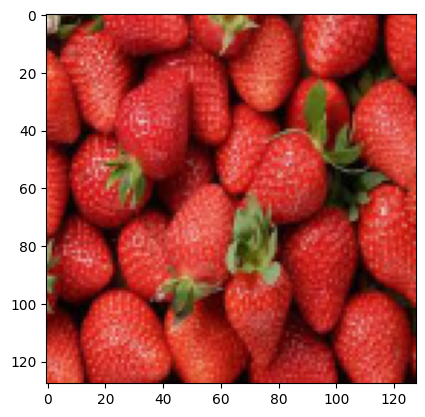

In [115]:
list_index = [0,1,2]
x = predictions

for i in range(3):
  for j in range(3):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

if list_index == [0,1,2]:
  print('Sampah Anorganik')
elif list_index == [1,2,0]:
  print('Sampah Beracun (B3')
elif list_index == [2,1,0]:
  print('Sampah Organik')

img = plt.imshow(resized_image)